In [889]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import Imputer

%matplotlib inline

In [890]:
dataset = pd.read_csv('../train-missings.csv')

In [891]:
dataset.head()

,Id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
0,1,2596.0,NaN,3.0,NaN,0.0,NaN,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,5
1,2,2590.0,56.0,2.0,212.0,NaN,390.0,220.0,NaN,NaN,6225.0,1.0,0.0,0.0,5
2,3,2804.0,NaN,9.0,268.0,65.0,3180.0,NaN,238.0,NaN,6121.0,NaN,0.0,0.0,2
3,4,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,NaN,0.0,2
4,5,2595.0,45.0,NaN,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,5


In [892]:
dataset.shape

(15120, 15)

In [893]:
[(c, np.size(dataset[c].unique())) for c in dataset.columns]

[('Id', 15120),
 ('p1', 1634),
 ('p2', 362),
 ('p3', 53),
 ('p4', 380),
 ('p5', 408),
 ('p6', 2986),
 ('p7', 172),
 ('p8', 137),
 ('p9', 247),
 ('p10', 2526),
 ('p11', 3),
 ('p12', 3),
 ('p13', 3),
 ('target', 7)]

##### Drop "Id" column because our dataset has 15120 rows and the "Id" column also has 15120 unique value 

In [894]:
dataset = dataset.drop(columns='Id')

In [895]:
dataset.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
0,2596.0,NaN,3.0,NaN,0.0,NaN,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,NaN,390.0,220.0,NaN,NaN,6225.0,1.0,0.0,0.0,5
2,2804.0,NaN,9.0,268.0,65.0,3180.0,NaN,238.0,NaN,6121.0,NaN,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,NaN,0.0,2
4,2595.0,45.0,NaN,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,5


In [896]:
[(c, dataset[c].isnull().sum() / dataset.shape[0]) for c in dataset.columns]

[('p1', 0.19603174603174603),
 ('p2', 0.1939153439153439),
 ('p3', 0.2),
 ('p4', 0.20165343915343914),
 ('p5', 0.20085978835978835),
 ('p6', 0.20257936507936508),
 ('p7', 0.19636243386243385),
 ('p8', 0.20403439153439154),
 ('p9', 0.20152116402116402),
 ('p10', 0.1962962962962963),
 ('p11', 0.20429894179894179),
 ('p12', 0.20429894179894179),
 ('p13', 0.19325396825396826),
 ('target', 0.0)]

##### Impute with average of the column

In [897]:
#clean_dataset = dataset.fillna(dataset.mean())

In [901]:
train_valid, test = train_test_split(dataset, test_size = 0.2, random_state = 42)

In [902]:
train, validation  = train_test_split(train_valid, test_size = test.shape[0]/train_valid.shape[0], random_state = 42)

In [903]:
print(train.shape)
print(validation.shape)
print(test.shape)

(9072, 14)
(3024, 14)
(3024, 14)


##### Impute the last 3 columns with the most frequent instead of average because there are only 0 and 1 values 

In [904]:
imp1 = Imputer(strategy='mean').fit(train.values[:,:10])
imp2 = Imputer(strategy='most_frequent').fit(train.values[:,10:13])

dat1 = imp1.transform(train.values[:,:10])
dat2 = imp2.transform(train.values[:,10:13])
train = pd.DataFrame(np.hstack((dat1, dat2, train.values[:,-1][:,np.newaxis])), columns=train.columns)

dat1 = imp1.transform(validation.values[:,:10])
dat2 = imp2.transform(validation.values[:,10:13])
validation = pd.DataFrame(np.hstack((dat1, dat2, validation.values[:,-1][:,np.newaxis])), columns=validation.columns)

dat1 = imp1.transform(test.values[:,:10])
dat2 = imp2.transform(test.values[:,10:13])
test = pd.DataFrame(np.hstack((dat1, dat2, test.values[:,-1][:,np.newaxis])), columns=test.columns)

##### Our dataset is completely balanced so doesn't need any operation for that

In [905]:
clean_dataset.groupby('target').target.count()

target
1.0    2160
2.0    2160
3.0    2160
4.0    2160
5.0    2160
6.0    2160
7.0    2160
Name: target, dtype: int64

##### Visualize data

In [845]:
data = PCA(n_components=2).fit_transform(clean_dataset.values[:,:-1])

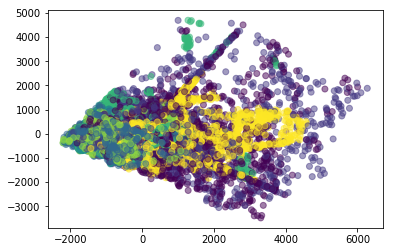

In [846]:
plt.scatter(data[:,0], data[:,1], c=clean_dataset.target, cmap = 'viridis', alpha= 0.5)

##### Test data for if it has some embedings

In [284]:
data = Isomap(n_components=2).fit_transform(train.values[:,:-1])

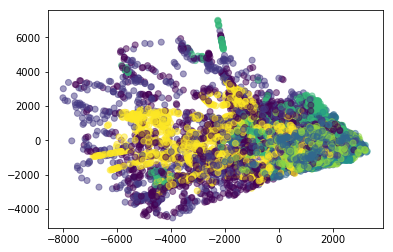

In [285]:
plt.scatter(data[:,0], data[:,1], c=clean_dataset.target, cmap = 'viridis', alpha= 0.5)

In [906]:
data = PCA().fit(train.values[:,:-1])

In [907]:
np.round(data.explained_variance_ratio_, 3)

array([0.671, 0.271, 0.041, 0.012, 0.004, 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   ])

In [908]:
pca_model = PCA(n_components=7).fit(train.values[:,:-1])
x_train = pca_model.transform(train.values[:,:-1])
x_validation = pca_model.transform(validation.values[:,:-1])
# iso_model = Isomap(n_components=7).fit(train.values[:,:-1])
# x_train = iso_model.transform(train.values[:,:-1])
# x_validation = iso_model.transform(validation.values[:,:-1])

In [919]:
model = LogisticRegression()

In [920]:
model.fit(x_train, train.values[:,-1])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [921]:
print(model.score(x_train, train.values[:,-1]))
print(model.score(x_validation, validation.values[:,-1]))

0.45811287477954143
0.4695767195767196


In [853]:
model2 = RandomForestClassifier()

In [854]:
from sklearn.grid_search import GridSearchCV

In [858]:
params = {'n_estimators': np.arange(1,200), 'max_depth': np.arange(1,25)}
grid = GridSearchCV(model2, params)

In [859]:
grid.fit(x_train, train.values[:,-1])

KeyboardInterrupt: 

In [922]:
model2 = RandomForestClassifier(n_estimators=150, max_depth=20)
model2.fit(x_train, train.values[:,-1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [924]:
print(model2.score(x_train, train.values[:,-1]))
print(model2.score(x_validation, validation.values[:,-1]))

0.9997795414462081
0.6633597883597884


## At last compute the accuracy on the test set that didn't touch until now

In [925]:
x_test = pca_model.transform(test.values[:,:-1])
print(model2.score(x_test, test.values[:,-1]))

0.6626984126984127


In [926]:
from joblib import dump

In [927]:
dump(model2, 'best_model')
dump(imp1, 'imputer_c1_c10')
dump(imp2, 'imputer_c11_c13')
dump(pca_model, 'pca')

['pca']